## **PROJECT:02**

**AIM: UNEMPLOYMENT ANALYSIS WITH PYTHON**

**TO: OASIS INFOBYTE**

**FROM: AARYAN LIMBASIYA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **(01) Importing Required Libraries:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## **(02) Load The Data:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')

# Display the first few rows of the dataframe and the column names
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Column Names:
Index(['Region', ' Date', ' Frequency', ' Estimat

## **(03) Data Preprocessing:**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values as necessary (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])


Missing Values:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


<ipython-input-10-2f08cd0d2f62>:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


## **(04) Descriptive Statistics:**

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            768                       768.000000   
mean   2019-12-20 01:48:45.000000256                        11.627969   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.720000   
50%              2019-12-31 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.472500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.566371   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.680000e+02                               768.000000  
mean         7.494411e+06                                42.497956  
min          4.942000e+04                                13.330000  
25%          1.376532e+06                

## **(05) Data Visualization:**

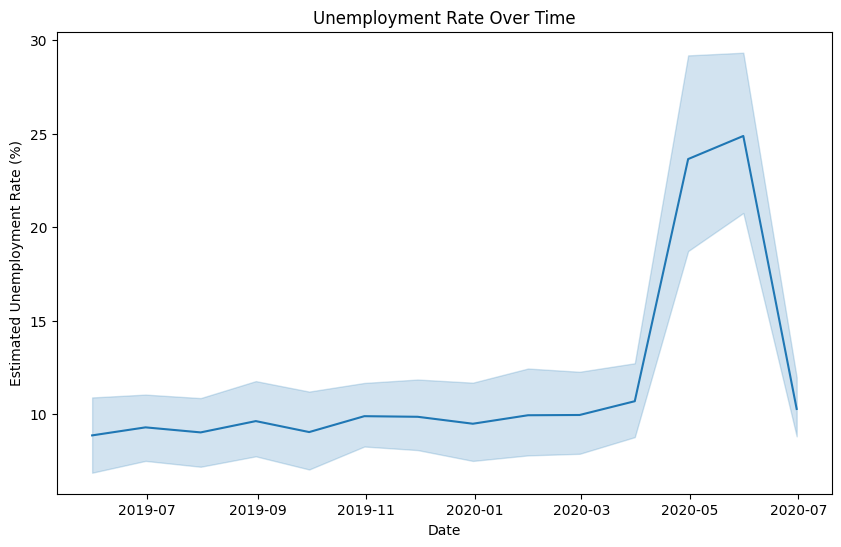

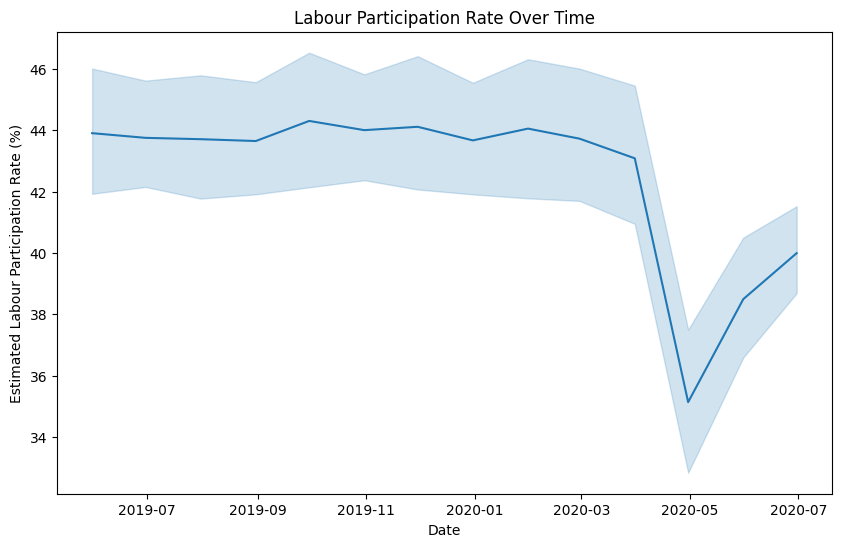

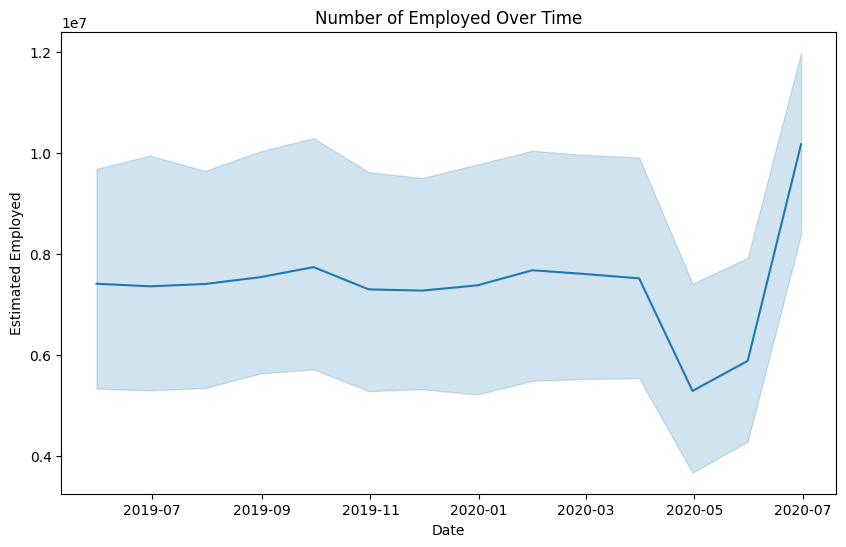

In [ ]:
# Unemployment rate trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

# Labor Participation Rate trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Labour Participation Rate (%)', data=df)
plt.title('Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

# Number of Employed trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Employed', data=df)
plt.title('Number of Employed Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.show()

## **(06) Correlation Analysis:**


Correlation Matrix:
                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.236503   
Estimated Labour Participation Rate (%)                         0.007634   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.236503   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.000277   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.007634  
Estimated Employed                                                      0.000277  
Estimated Labour Participation Rate (%)                                 1.000000  


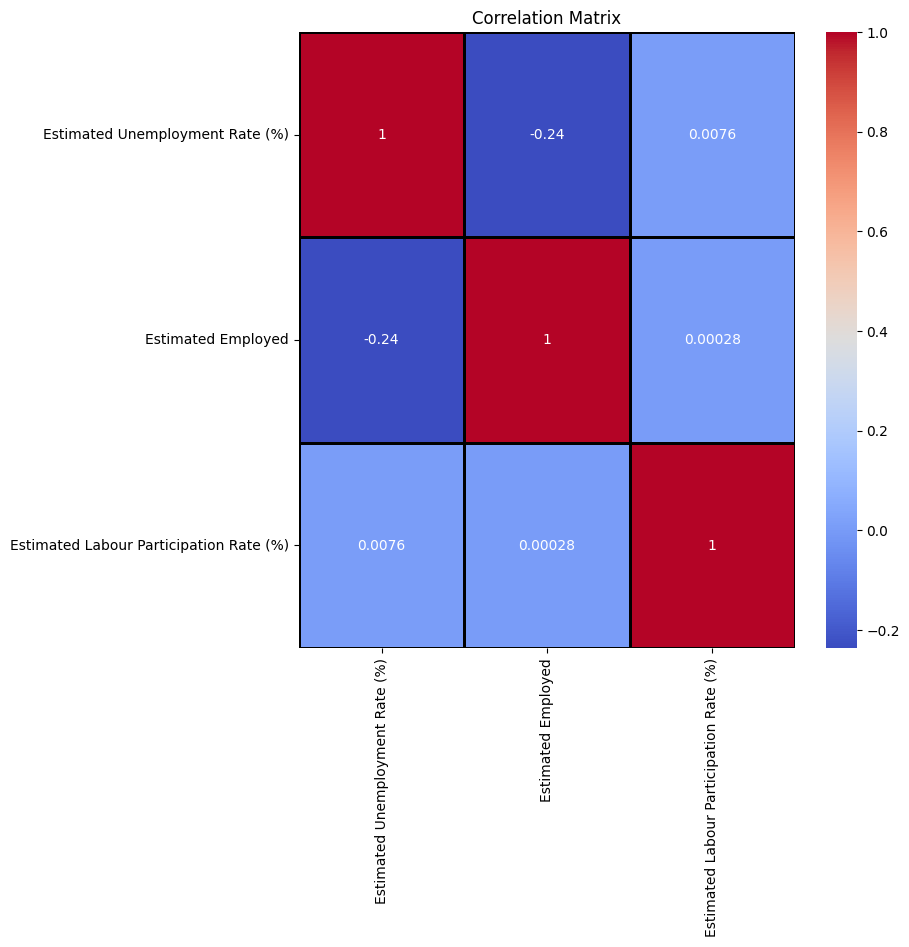

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='k')
plt.title('Correlation Matrix')
plt.show()

## **(07) Time Series Analysis(Advanced Analysis):**

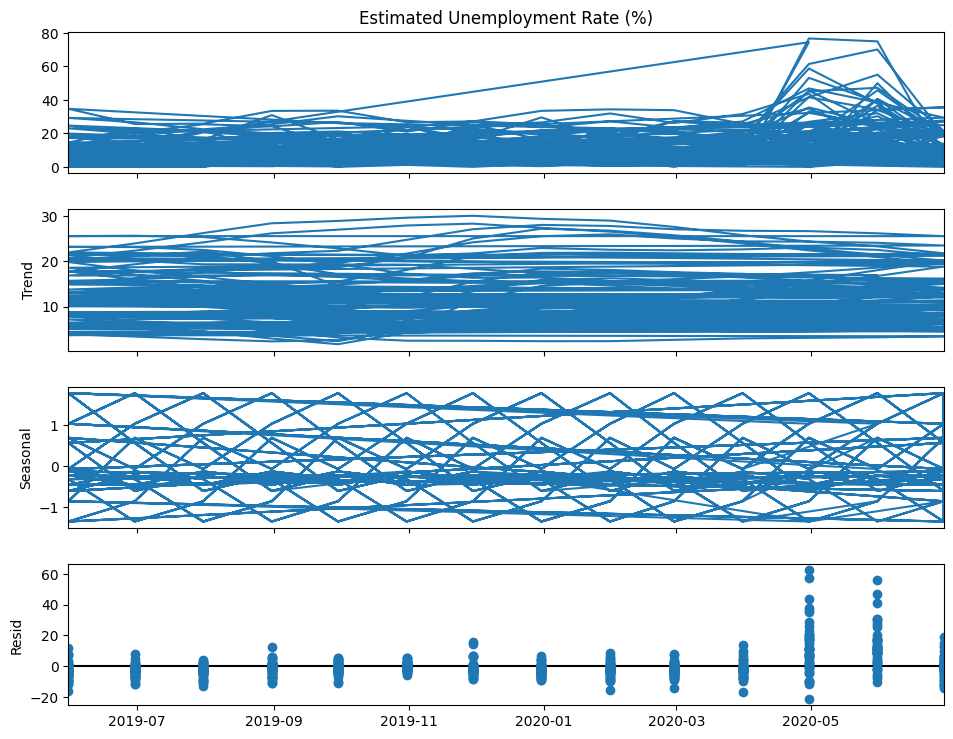

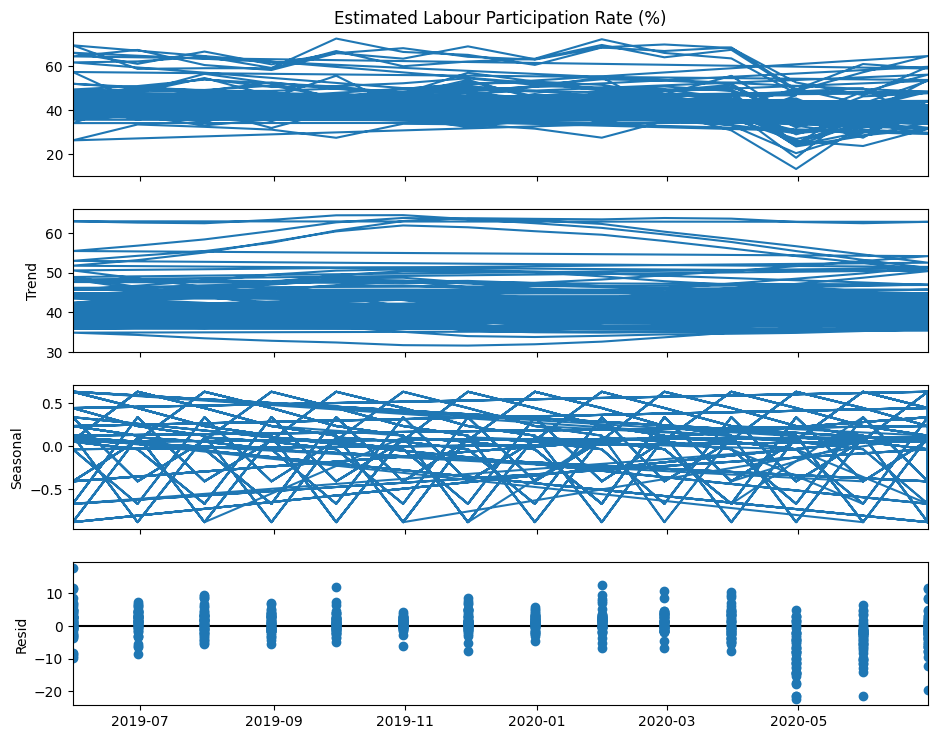

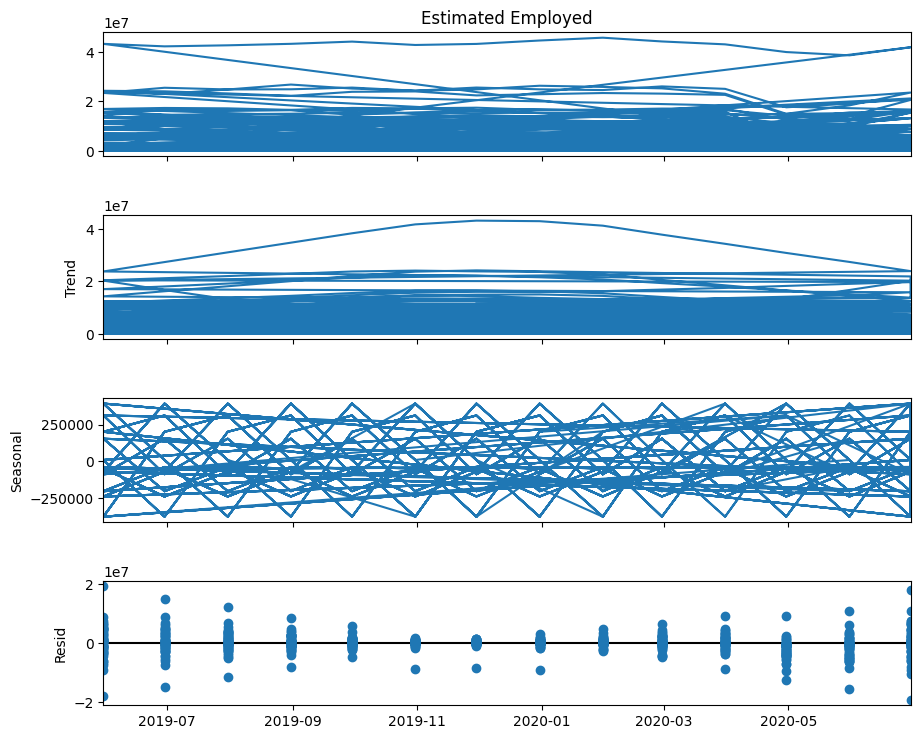

In [ ]:
# Ensure the 'Date' column is set as index
df.set_index('Date', inplace=True)

# Decompose the time series to see the trend, seasonality, and residuals for unemployment rate
decomposition = sm.tsa.seasonal_decompose(df['Estimated Unemployment Rate (%)'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Decompose the time series for labour participation rate
decomposition = sm.tsa.seasonal_decompose(df['Estimated Labour Participation Rate (%)'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Decompose the time series for number of employed
decomposition = sm.tsa.seasonal_decompose(df['Estimated Employed'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()